<a href="https://colab.research.google.com/github/SenaKymk/HSenaKymk_YZM212_lab_proje/blob/main/LinearRegressionWLSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

veri = pd.read_csv("/content/Student_Performance.csv")
print(veri.head())
print(veri.info())
print(veri.describe())


   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------              

In [2]:
veri["Extracurricular Activities"] = veri["Extracurricular Activities"].map({"Yes": 1, "No": 0})


In [3]:
X = veri[["Hours Studied", "Previous Scores", "Extracurricular Activities",
          "Sleep Hours", "Sample Question Papers Practiced"]]
y = veri["Performance Index"]


In [4]:
import numpy as np
X = np.c_[np.ones(X.shape[0]), X]


In [5]:
theta = np.linalg.inv(X.T @ X) @ X.T @ y


In [6]:
y_pred = X @ theta


In [7]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
print("MSE (WLSE):", mse)


MSE (WLSE): 4.151350633946038


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [10]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 4.082628398521857
R^2 Score: 0.9889832909573145


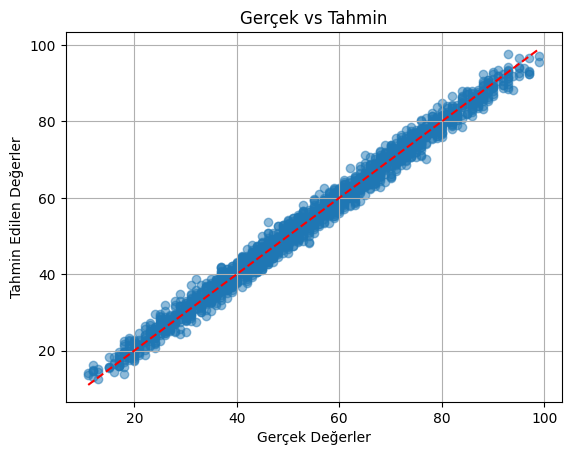

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek vs Tahmin")
plt.grid(True)
plt.show()
